# GeoPandas

<img src="https://geopandas.org/en/stable/_images/geopandas_logo.png" width=600>

https://geopandas.org/en/stable/

In [ ]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 3.5 MB/s 
     |████████████████████████████████| 6.3 MB 30.3 MB/s 
     |████████████████████████████████| 16.7 MB 7.5 MB/s 


In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
# Geopandas has some maps already avilable as datasets
gpd.datasets.available

['naturalearth_cities', 'naturalearth_lowres', 'nybb']

In [ ]:
gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,7111024,Europe,Serbia,SRB,101800.0,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,642550,Europe,Montenegro,MNE,10610.0,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1895250,Europe,Kosovo,-99,18490.0,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1218208,North America,Trinidad and Tobago,TTO,43570.0,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


In [ ]:
# This Datasets are known as GeoDataFrames, therefore they have much of the functionalities of a DF
type(gpd.read_file(gpd.datasets.get_path('naturalearth_lowres')))

geopandas.geodataframe.GeoDataFrame

In [ ]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


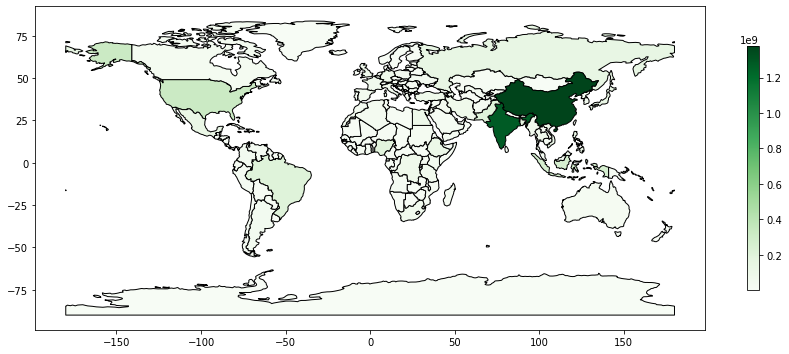

In [ ]:
# Creating a first plot of the world population
# https://matplotlib.org/3.5.0/tutorials/colors/colormaps.html
world.plot(column="pop_est",          # Column name that will be used to determine the color scale
               legend=True,           # The legend with the color scale will be shown on the right of the map
               cmap='Greens',         # Palette color used
               edgecolor="black",
               legend_kwds={'shrink': 0.3},
               figsize=(15,15))
plt.show()

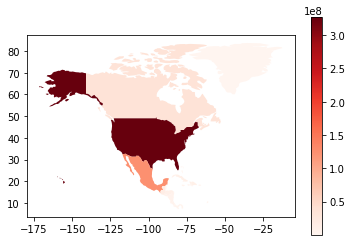

In [ ]:
# It is possible to filter the Geo-DF to create a chart from a specific region
north_america=world[world["continent"]=='North America']
north_america.plot(column="pop_est", legend=True, cmap="Reds")
plt.show()

# Cities in USA

In [ ]:
# Let's start by creating a DataFrame with a some locations in the US
# For that, we will start by listing the top 10 most populated cities in USA
cities=["New York City, NY", "Los Angeles, CA", "Chicago, IL",
      "Houston, TX", "Phoenix, AZ", "Philadelphia, PA",
      "San Antonio, TX", "San Diego, CA", "Dallas, TX", "San Jose, CA"]

In [ ]:
# geopy will help us to find the longitude and latitude of any location
!pip install geopy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="my-application")
location = geolocator.geocode("Eiffel Tower", timeout=200)
print(location.latitude, location.longitude)

48.858260200000004 2.2944990543196795


In [ ]:
latitudes=[]
longitudes=[]

# Since geopy makes use of different APIs to get the location, sometimes the execution
# time is exceeded and we might get an error. Therefore we will use a try-except block
# to avoid the code from crashing
for city in cities:
  try:
    location = geolocator.geocode(city)
    latitudes.append(location.latitude)
    longitudes.append(location.longitude)
  except:
    continue

In [ ]:
data={"Cities":cities[:len(latitudes)], "Latitudes":latitudes, "Longitudes":longitudes}
df=pd.DataFrame(data)
df

,Cities,Latitudes,Longitudes
0,"New York City, NY",40.712728,-74.006015
1,"Los Angeles, CA",34.053691,-118.242766
2,"Chicago, IL",41.875562,-87.624421
3,"Houston, TX",29.758938,-95.367697
4,"Phoenix, AZ",33.448437,-112.074141
5,"Philadelphia, PA",39.952724,-75.163526
6,"San Antonio, TX",29.424600,-98.495141
7,"San Diego, CA",32.717420,-117.162773
8,"Dallas, TX",32.776272,-96.796856
9,"San Jose, CA",37.336166,-121.890591


In [ ]:
# Building a Geo-DataFrame
gdf = gpd.GeoDataFrame(df, 
      geometry=gpd.points_from_xy(df.Longitudes, df.Latitudes))
gdf

,Cities,Latitudes,Longitudes,geometry
0,"New York City, NY",40.712728,-74.006015,POINT (-74.00602 40.71273)
1,"Los Angeles, CA",34.053691,-118.242766,POINT (-118.24277 34.05369)
2,"Chicago, IL",41.875562,-87.624421,POINT (-87.62442 41.87556)
3,"Houston, TX",29.758938,-95.367697,POINT (-95.36770 29.75894)
4,"Phoenix, AZ",33.448437,-112.074141,POINT (-112.07414 33.44844)
5,"Philadelphia, PA",39.952724,-75.163526,POINT (-75.16353 39.95272)
6,"San Antonio, TX",29.424600,-98.495141,POINT (-98.49514 29.42460)
7,"San Diego, CA",32.717420,-117.162773,POINT (-117.16277 32.71742)
8,"Dallas, TX",32.776272,-96.796856,POINT (-96.79686 32.77627)
9,"San Jose, CA",37.336166,-121.890591,POINT (-121.89059 37.33617)


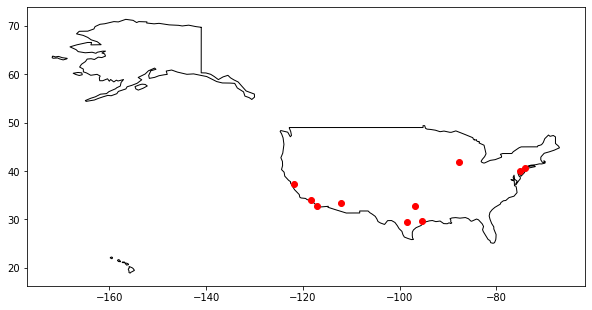

In [ ]:
fig, axs = plt.subplots(figsize=(10,10))
# We restrict to USA.
world[world.name == 'United States of America'].plot(
    color='white', edgecolor='black', ax=axs)

# We can now plot our ``GeoDataFrame``.
gdf.plot(ax=axs, color='red')

plt.show()

# Using GeoJSON

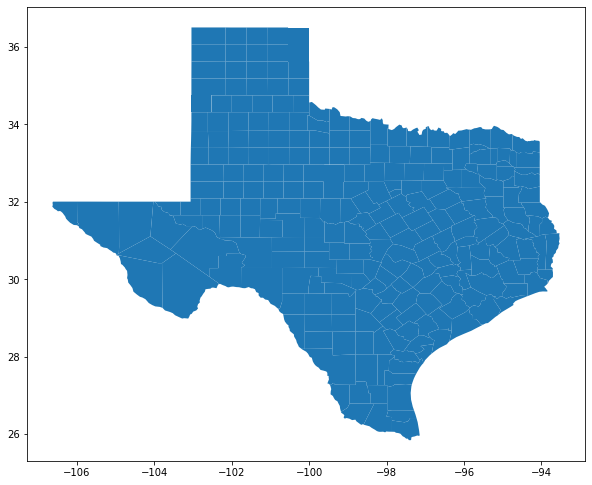

In [ ]:
# Building a Geo-DataFrame using a GeoJson provides a higher level of resolution
# GeoJSON and Shapefiles are available online
# https://github.com/edavgaun/topojson
texas_url="https://raw.githubusercontent.com/edavgaun/topojson/master/countries/us-states/TX-48-texas-counties.json"
texas=gpd.read_file(texas_url)
texas.plot(figsize=(10,10))
plt.show()

In [ ]:
# In order to create a Choroplet map, we need data that is going to be used to determine the color of each one of 
# the geometries within or current map.
# In this case, we will use data from an excel file located in the website of the Texas Health and Human Services
# It is possible to access a downloadable file directly from the internet using Python and the Operating System
!wget https://dshs.texas.gov/coronavirus/TexasCOVID19DailyCountyFatalityCountData.xlsx

--2022-10-06 00:21:31--  https://dshs.texas.gov/coronavirus/TexasCOVID19DailyCountyFatalityCountData.xlsx
Resolving dshs.texas.gov (dshs.texas.gov)... 52.26.98.234
Connecting to dshs.texas.gov (dshs.texas.gov)|52.26.98.234|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 607177 (593K) [application/vnd.openxmlformats-officedocument.spreadsheetml.sheet]
Saving to: ‘TexasCOVID19DailyCountyFatalityCountData.xlsx’

TexasCOVID19DailyCo 100%[===================>] 592.95K  --.-KB/s    in 0.06s   

2022-10-06 00:21:32 (9.67 MB/s) - ‘TexasCOVID19DailyCountyFatalityCountData.xlsx’ saved [607177/607177]



In [ ]:
# Make sure that you are using the correct name of the file
file_name="TexasCOVID19DailyCountyFatalityCountData.xlsx"
covid_data_excel=pd.ExcelFile(file_name)
covid_data_excel.sheet_names

['Fatalities by County 2020',
 'Fatalities by County 2021',
 'Fatalities by County 2022']

In [ ]:
covid_data_excel.parse('Fatalities by County 2020')

,"COVID-19 Total Fatalities by County, 03/07/2020 to 12/31/2020",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 291,Unnamed: 292,Unnamed: 293,Unnamed: 294,Unnamed: 295,Unnamed: 296,Unnamed: 297,Unnamed: 298,Unnamed: 299,Unnamed: 300
0,DISCLAIMER: All data are provisional and are s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,County,03/07/2020,03/08/2020,03/09/2020,03/10/2020,03/11/2020,03/12/2020,03/13/2020,03/14/2020,03/15/2020,...,12/22/2020,12/23/2020,12/24/2020,12/25/2020,12/26/2020,12/27/2020,12/28/2020,12/29/2020,12/30/2020,12/31/2020
2,Anderson,0,0,0,0,0,0,0,0,0,...,67,68,68,68,69,69,71,73,73,73
3,Andrews,0,0,0,0,0,0,0,0,0,...,26,26,28,29,30,31,31,31,32,33
4,Angelina,0,0,0,0,0,0,0,0,0,...,150,152,153,156,156,157,160,162,163,167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253,Young,0,0,0,0,0,0,0,0,0,...,28,29,29,30,30,30,30,32,32,32
254,Zapata,0,0,0,0,0,0,0,0,0,...,18,18,20,21,21,21,22,22,23,23
255,Zavala,0,0,0,0,0,0,0,0,0,...,29,29,29,29,29,29,29,29,29,29
256,Incomplete Address,0,0,0,0,0,0,0,0,0,...,4,4,4,4,4,4,4,4,5,5


In [ ]:
data={}
for sheet_name in covid_data_excel.sheet_names:
  data[sheet_name]=covid_data_excel.parse(sheet_name, 
                   header=2, 
                   index_col="County"
                   ).iloc[:-2,-1]

In [ ]:
covid_data=pd.DataFrame(data)
covid_data.head(3)

,Fatalities by County 2020,Fatalities by County 2021,Fatalities by County 2022
County,,,
Anderson,73,212,240
Andrews,33,69,72
Angelina,167,433,485


In [ ]:
# Removing additional columns and setting the name of the county as Index
texas=texas.set_index("NAME").sort_index().iloc[:,-1]
type(texas)

In [ ]:
# Combining the Geo-DataFrame with the data from COVID
map_data=pd.concat([covid_data,texas], axis=1)
map_data.columns

Index(['Fatalities by County 2020', 'Fatalities by County 2021',
       'Fatalities by County 2022', 'geometry'],
      dtype='object')

In [ ]:
# Converting DF into Geo-DF
map_data=gpd.GeoDataFrame(map_data, geometry="geometry")

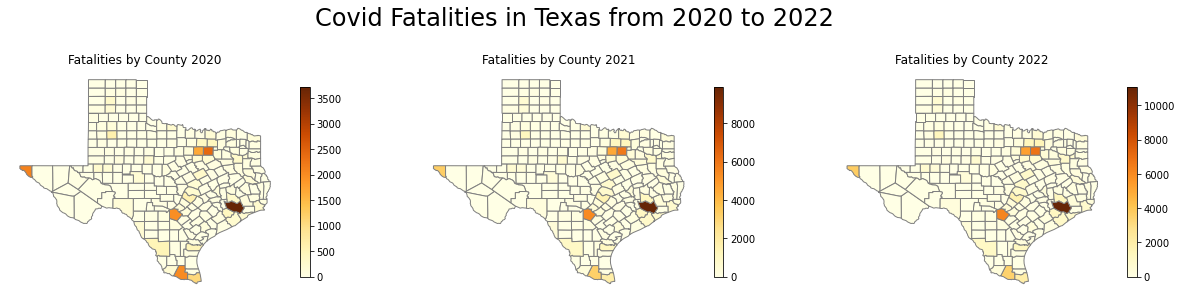

In [ ]:
fig, axs = plt.subplots(1,3, figsize=(21,7))
for n in range(3):
  map_data.plot(column=map_data.columns[n], ax=axs[n], 
                cmap="YlOrBr",edgecolor="gray", 
                legend=True, legend_kwds={'shrink': 0.5})
  axs[n].set_title(map_data.columns[n])
  axs[n].axis("off")
plt.suptitle("Covid Fatalities in Texas from 2020 to 2022", fontsize=24, y=0.85)
plt.show()